In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['grid', 'notebook'])

In [10]:
h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
h = h_bar * 2 * np.pi

def dispersive_shift(g, delta, alpha):
    return -g**2/delta*(1/(1+delta/alpha))

def calculate_Ej(Ec, qubit_frequency):
    return ((qubit_frequency*h) + Ec)**2/(8*Ec)

def coupling_strength(Cg, Cq, Cr, resonator_f):
    g= 1/2  * resonator_f *Cg/np.sqrt((Cq+Cg)*(Cg+Cr))
    return g

def calculate_cr(frequency, impedance):
    # Calculate L and C based on the given equations
    L = impedance / (2 * np.pi * frequency)
    C = 1 / (4 * np.pi**2 * frequency**2 * L) 
    return L, C

def epsilon_m(m, E_C, E_J):
    return ((-1)**m * E_C * (2**(4*m + 5) / math.factorial(m)) * 
            np.sqrt(2 / np.pi) * (E_J / (2 * E_C))**(m/2 + 3/4) * 
            np.exp(-np.sqrt(8 * E_J / E_C)))

def calculate_frequency_energy(Ej, Ec):
    return np.sqrt(8*Ej*Ec)-Ec


def calculate_params(qubit_f, c_g, c_q = 1.647e-13, resonator_f = 6.7e9):
    # Constants
    h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
    e = 1.60217662e-19  # Elementary charge in C
    Zr = 50  # Ohm, characteristic impedance of the resonator
    h = h_bar * 2 * np.pi
    c_g = c_g
    qubit_f = qubit_f
    resonator_f = resonator_f # Hz
    delta = resonator_f - qubit_f # Hz
    q_ext = 11502

    # calcualte parameteres
    r_L, c_r = calculate_cr(resonator_f, 50)
    E_c = e**2 / (2*c_q) # J
    alpha = E_c/h_bar # Hz*2pi
    E_j = calculate_Ej(E_c, qubit_f) # J
    g = coupling_strength(c_g, c_q, c_r, resonator_f) # Hz
    chi = dispersive_shift(g, delta, alpha) # Hz

    phi_0 = h/(2*e)
    I_c = E_j*2*np.pi/phi_0
    jj_area = I_c/(0.5e-6)/2
    jj_width = jj_area/0.2

    kappa = resonator_f / q_ext
    T1_purcell_limit = 2 * alpha / kappa**2 *(2 * np.pi) 

    m = 1
    print(f'qubit frequency: {qubit_f/1e9} GHz')
    print(f'alpha: {alpha / 2 / np.pi / 1e6} * 2pi MHz')
    print(f'E_j/h = {E_j/h/1e9}')
    print(f'E_c/h = {E_c/h/1e9}')
    print(f'E_j/E_c = {E_j/E_c}')
    print(f'jj_width: {jj_width} um')
    print(f'g: {np.round(g/1e6,2)}e6')
    print(f'dispersive_shift: {chi/1e6} MHz')
    print(f'T1 Purcell limit: {T1_purcell_limit} s')
    # print(f'epsilon_{m}: {epsilon_m(m, E_c,E_j)}')
    print(f'N_level = {2*E_j/(np.sqrt(8*E_j*E_c))}')

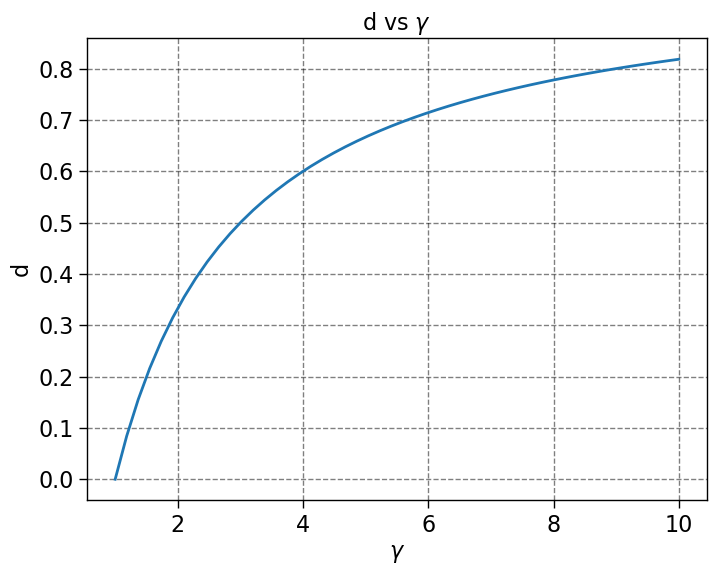

In [11]:
# explore the relationship of gamma
gamma = np.linspace(1, 10)
d = (gamma-1)/(gamma+1)
plt.figure(figsize=(8, 6))
plt.plot(gamma, d)
plt.xlabel(r'$\gamma$')
plt.ylabel('d')
plt.title(r'd vs $\gamma$')
plt.show()

In [12]:
# # asymmetric
# e = 1.60217662e-19  # Elementary charge in C
# h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
# h = h_bar * 2 * np.pi
# phi_0 = h/(2*e)
# Phi_e = np.linspace(-np.pi, np.pi)
# phi_e = np.pi*Phi_e/phi_0
# # E_j_sum = (EJ_1 + EJ_2)*np.sqrt((np.cos(phi_e))**2 + d**2 * (np.sin(phi_e))**2 )

In [13]:
def calculate_jj_width(Ej, J_c = 0.5e-6, jj_length = 0.2):
    h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
    e = 1.60217662e-19  # Elementary charge in C
    Zr = 50  # Ohm, characteristic impedance of the resonator
    h = h_bar * 2 * np.pi

    phi_0 = h/(2*e)
    I_c = Ej*2*np.pi/phi_0
    jj_area = I_c/(J_c)
    jj_width = jj_area/jj_length
    return jj_width

def calculate_Ej_from_width(jj_width, J_c = 0.5e-6, jj_length = 0.2):
    h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
    e = 1.60217662e-19  # Elementary charge in C
    Zr = 50  # Ohm, characteristic impedance of the resonator
    h = h_bar * 2 * np.pi

    phi_0 = h/(2*e)
    Ic = J_c*jj_length*jj_width
    Ej = Ic*phi_0/(2*np.pi)
    return Ej

def calculate_qubit_f(Ej, Ec):
    h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
    e = 1.60217662e-19  # Elementary charge in C
    Zr = 50  # Ohm, characteristic impedance of the resonator
    h = h_bar * 2 * np.pi
    return (np.sqrt(8*Ej*Ec)-Ec)/h

In [14]:


def calculate_params_asymmetric(qubit_f, c_g, c_q = 1.647e-13, resonator_f = 6.639e9, ratio = 0.83):
    # Constants
    h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
    e = 1.60217662e-19  # Elementary charge in C
    Zr = 50  # Ohm, characteristic impedance of the resonator
    h = h_bar * 2 * np.pi
    c_g = c_g
    qubit_f = qubit_f
    resonator_f = resonator_f # Hz
    q_ext = 11502

    # calcualte parameteres
    r_L, c_r = calculate_cr(resonator_f, 50)
    E_c = e**2 / (2*c_q) # J
    alpha = E_c/h_bar # Hz*2pi
    E_j = calculate_Ej(E_c, qubit_f) # J

    Ej1 = E_j*(ratio)
    Ej2 = E_j*(1-ratio)
    jj1_width = calculate_jj_width(Ej=Ej1)
    jj2_width = calculate_jj_width(Ej=Ej2)
    jj1_width = np.round(jj1_width, 2)
    jj2_width = np.round(jj2_width, 2)
    assert (jj1_width > 0.1)
    assert (jj2_width > 0.1)
    Ej1 = calculate_Ej_from_width(jj1_width)
    Ej2 = calculate_Ej_from_width(jj2_width)
    Ej_new = Ej1+Ej2

    qubit_f = calculate_qubit_f(Ej_new, E_c)

    gamma = Ej1/Ej2
    d = (gamma-1)/(gamma+1)
    phi_e = np.linspace(-np.pi, np.pi, 1000)
    E_j_sum = (Ej1 + Ej2)* np.sqrt((np.cos(phi_e))**2 + d**2 * (np.sin(phi_e))**2 )


    delta = resonator_f - qubit_f # Hz
    g = coupling_strength(c_g, c_q, c_r, resonator_f) # Hz
    chi = dispersive_shift(g, delta, alpha) # Hz


    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
    ax[0].plot(phi_e, E_j_sum/E_c)
    qubit_f_energy = calculate_frequency_energy(E_j_sum, E_c)
    ax[1].plot(phi_e, qubit_f_energy/h/1e9, label = r'$f_{01}$')
    ax[1].plot(phi_e, qubit_f_energy/h/1e9-E_c/h/1e9, '--', label = r'$f_{12}$')
    ax[1].legend()
    ax[1].set_ylim(4, 6.5)
    ax[1].set_xlabel(r'$\phi_e$')
    ax[0].set_xlabel(r'$\phi_e$')
    ax[0].set_ylabel(r'$\frac{E_j}{E_c}$')
    ax[1].set_ylabel('frequency [GHz]')


    kappa = resonator_f / q_ext
    T1_Purcell = (delta**2) / (kappa * (g**2))
    print(f'qubit frequency: {qubit_f/1e9} GHz')
    print(f'detuning: {delta/1e9} GHz')
    print(f'E_j/h = {Ej_new/h/1e9}')
    print(f'E_c/h = {E_c/h/1e9}')
    print(f'alpha: {E_c / h_bar / 2 / np.pi / 1e6} * 2pi MHz')
    print(f'JJ asymmetry: {gamma}')
    print(f'jj_width1 and jj_width2: {jj1_width} and {jj2_width} um')
    print(f'E_j/E_c = {Ej_new/E_c}')
    print(f'g: {np.round(g/1e6,2)} MHz')
    print(f'dispersive_shift: {chi/1e6} MHz')
    print(f'N_level = {2*Ej_new/(np.sqrt(8*Ej_new*E_c))}')
    print(f'Purcell T1: {T1_Purcell}')

    # kappa = resonator_f / q_ext
    # print()
    # print(delta/1e6)
    # print(kappa/1e6)

    # frequency = np.linspace(4.5, 6, 500) * 1e9
    # delta = resonator_f - frequency
    # chi = dispersive_shift(g, delta, alpha) # Hz
    # plt.figure(figsize=(8,8))
    # plt.plot(frequency, chi)
    # plt.show()


qubit frequency: 5.417202245113099 GHz
detuning: 1.221797754886901 GHz
E_j/h = 31.291061452355372
E_c/h = 0.12259638803963795
alpha: 122.59638803963796 * 2pi MHz
JJ asymmetry: 4.727272727272728
jj_width1 and jj_width2: 0.52 and 0.11 um
E_j/E_c = 255.23640584124163
g: 63.93 MHz
dispersive_shift: -1.2933452803222745 MHz
N_level = 11.296822691386318
Purcell T1: 0.0006328537277622178


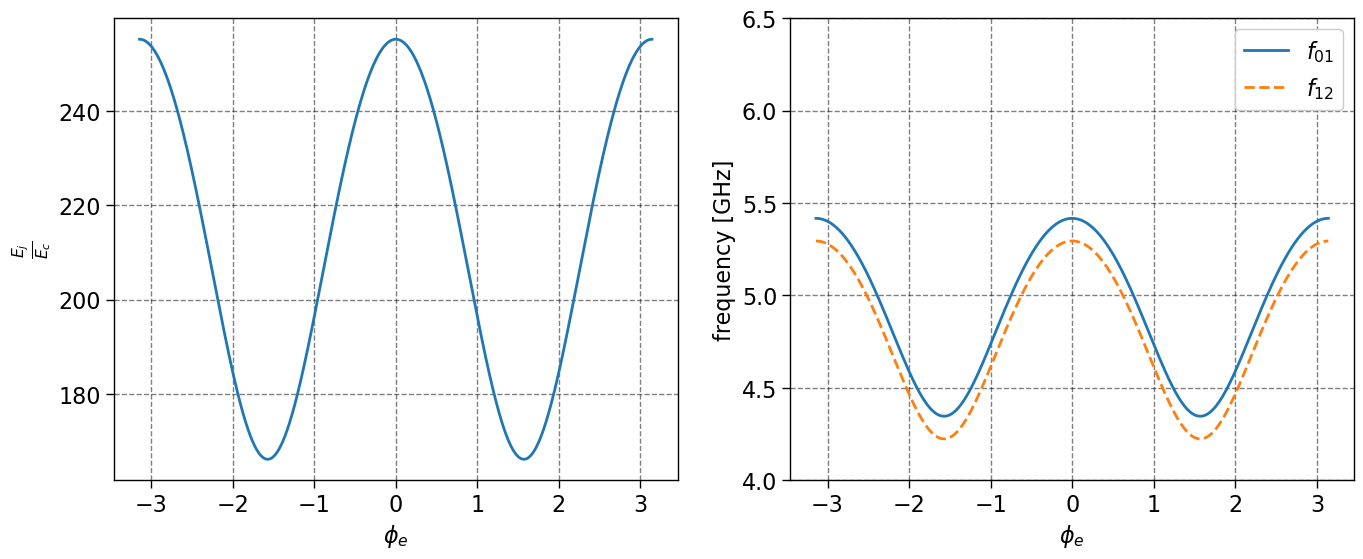

In [15]:
calculate_params_asymmetric(qubit_f=5.4e9, c_g=5.421e-15, c_q = 1.58e-13, ratio = 0.83, resonator_f=6.639e9)

qubit frequency: 6.001881438724137 GHz
detuning: 0.8771185612758627 GHz
E_j/h = 38.2446306639899
E_c/h = 0.12259638803963795
alpha: 122.59638803963796 * 2pi MHz
JJ asymmetry: 5.416666666666668
jj_width1 and jj_width2: 0.65 and 0.12 um
E_j/E_c = 311.9556071392953
g: 67.41 MHz
dispersive_shift: -2.422449973895226 MHz
N_level = 12.489107396833758
Purcell T1: 0.00028307807108385785


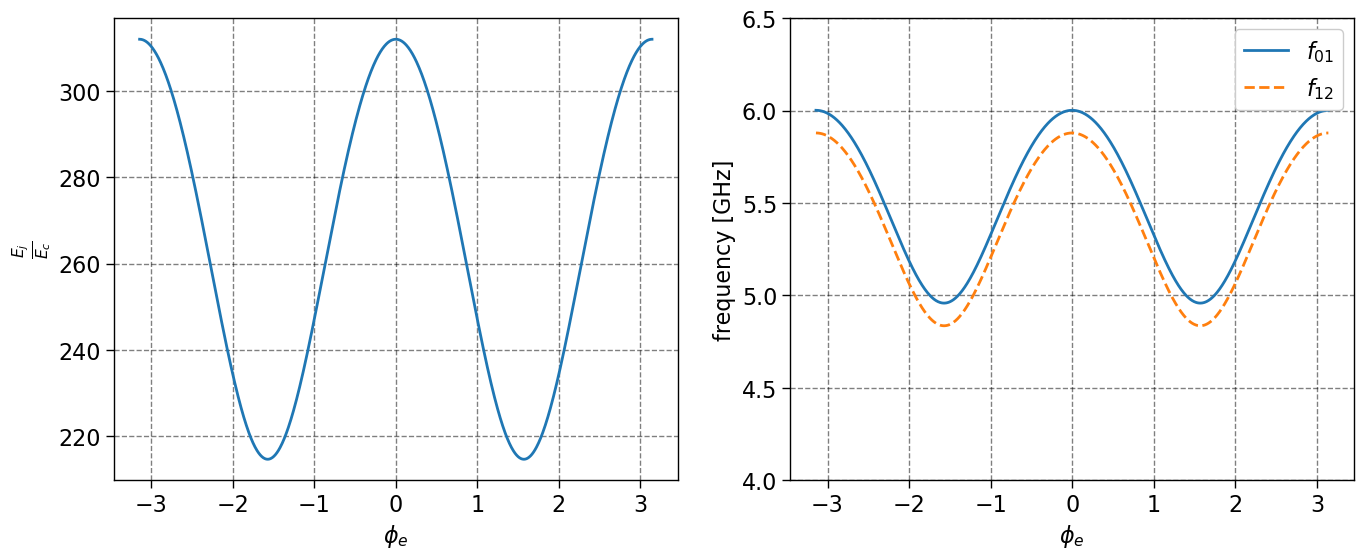

In [16]:
calculate_params_asymmetric(qubit_f=6e9, c_g=5.421e-15, c_q = 1.58e-13, ratio = 0.85, resonator_f=6.879e9)